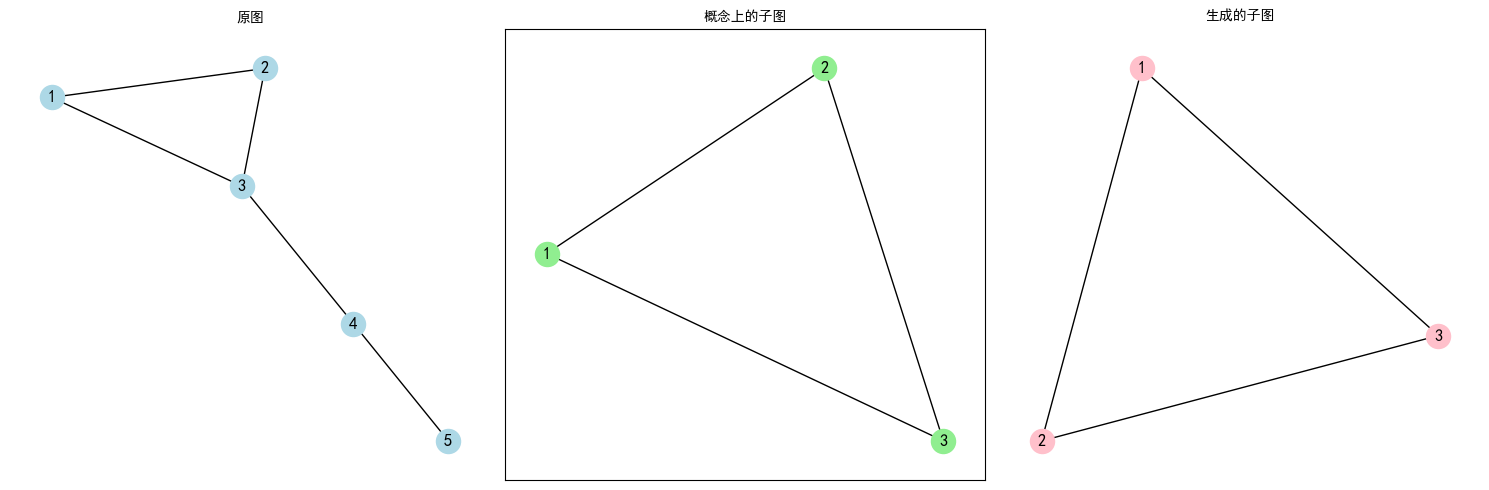

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

# 创建一个原图
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,3), (3,4), (4,5)])

# 定义一个子图（这只是概念上的定义）
subgraph_nodes = [1, 2, 3]
subgraph_edges = [(1,2), (1,3), (2,3)]

# 生成子图（这是一个过程）
generated_subgraph = G.subgraph(subgraph_nodes)

# 可视化
plt.figure(figsize=(15, 5))

plt.subplot(131)
nx.draw(G, with_labels=True, node_color='lightblue', font_family='SimHei')
plt.title("原图", fontproperties='SimHei')

plt.subplot(132)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=pos, nodelist=subgraph_nodes, node_color='lightgreen')
nx.draw_networkx_edges(G, pos=pos, edgelist=subgraph_edges)
nx.draw_networkx_labels(G, pos=pos, font_family='SimHei')
plt.title("概念上的子图", fontproperties='SimHei')

plt.subplot(133)
nx.draw(generated_subgraph, with_labels=True, node_color='pink', font_family='SimHei')
plt.title("生成的子图", fontproperties='SimHei')

plt.tight_layout()
plt.show()

#### 领接图
MGraph.cpp

C:\Users\Asuka\AppData\Local\Temp\ipykernel_22896\3524659781.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


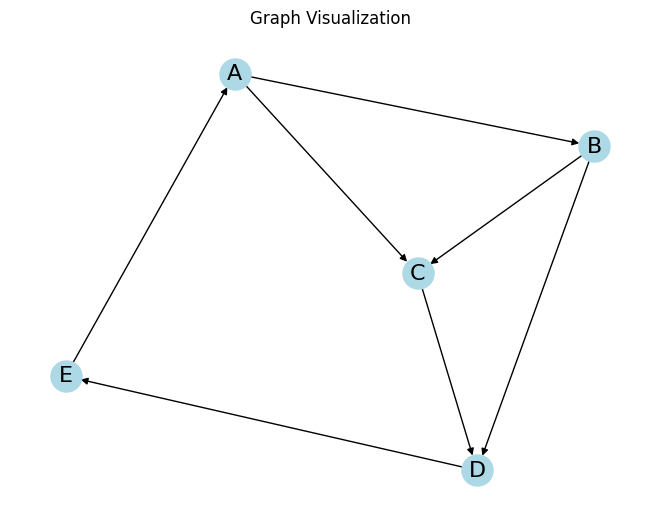

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建图
G = nx.DiGraph()

# 添加节点
nodes = ['A', 'B', 'C', 'D', 'E']
G.add_nodes_from(nodes)

# 添加边
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E'), ('E', 'A')]
G.add_edges_from(edges)

# 绘制图
pos = nx.spring_layout(G)  # 定位算法
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, arrows=True)

# 显示图
plt.title("Graph Visualization")
plt.axis('off')
plt.tight_layout()
plt.show()

# 如果你想保存图像
# plt.savefig("graph.png")

C:\Users\Asuka\AppData\Local\Temp\ipykernel_22896\2165730708.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


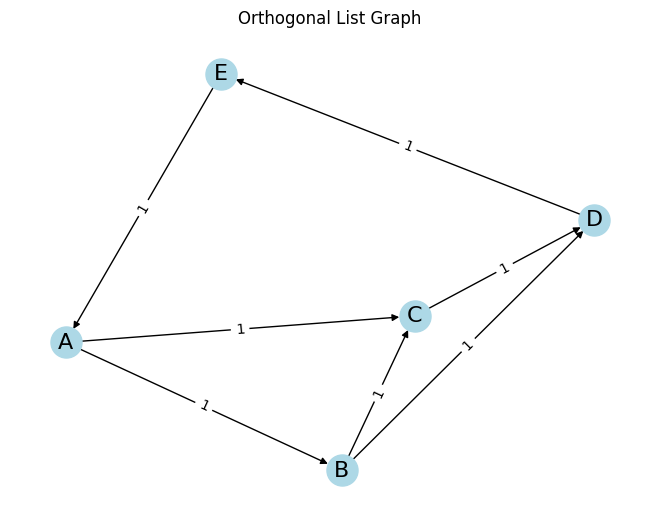

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

class ArcNode:
    def __init__(self, tailvex, headvex, weight=1):
        self.tailvex = tailvex
        self.headvex = headvex
        self.weight = weight
        self.hlink = None
        self.tlink = None

class VNode:
    def __init__(self, data):
        self.data = data
        self.firstin = None
        self.firstout = None

class OrthogonalListGraph:
    def __init__(self):
        self.vertices = []
        self.vexnum = 0
        self.arcnum = 0

    def create_default_graph(self):
        self.vertices = [VNode(data) for data in 'ABCDE']
        self.vexnum = 5
        self.arcnum = 7

        self.insert_arc(0, 1)  # A->B
        self.insert_arc(0, 2)  # A->C
        self.insert_arc(1, 2)  # B->C
        self.insert_arc(1, 3)  # B->D
        self.insert_arc(2, 3)  # C->D
        self.insert_arc(3, 4)  # D->E
        self.insert_arc(4, 0)  # E->A

    def insert_arc(self, tail, head, weight=1):
        p = ArcNode(tail, head, weight)
        p.tlink = self.vertices[tail].firstout
        self.vertices[tail].firstout = p
        p.hlink = self.vertices[head].firstin
        self.vertices[head].firstin = p

    def visualize(self):
        G = nx.DiGraph()
        
        # 添加节点
        for i, v in enumerate(self.vertices):
            G.add_node(f"{v.data}")

        # 添加边
        for i, v in enumerate(self.vertices):
            p = v.firstout
            while p:
                G.add_edge(self.vertices[i].data, self.vertices[p.headvex].data, weight=p.weight)
                p = p.tlink

        # 绘制图
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, arrows=True)
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.title("Orthogonal List Graph")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

# 测试代码
if __name__ == "__main__":
    G = OrthogonalListGraph()
    G.create_default_graph()
    G.visualize()

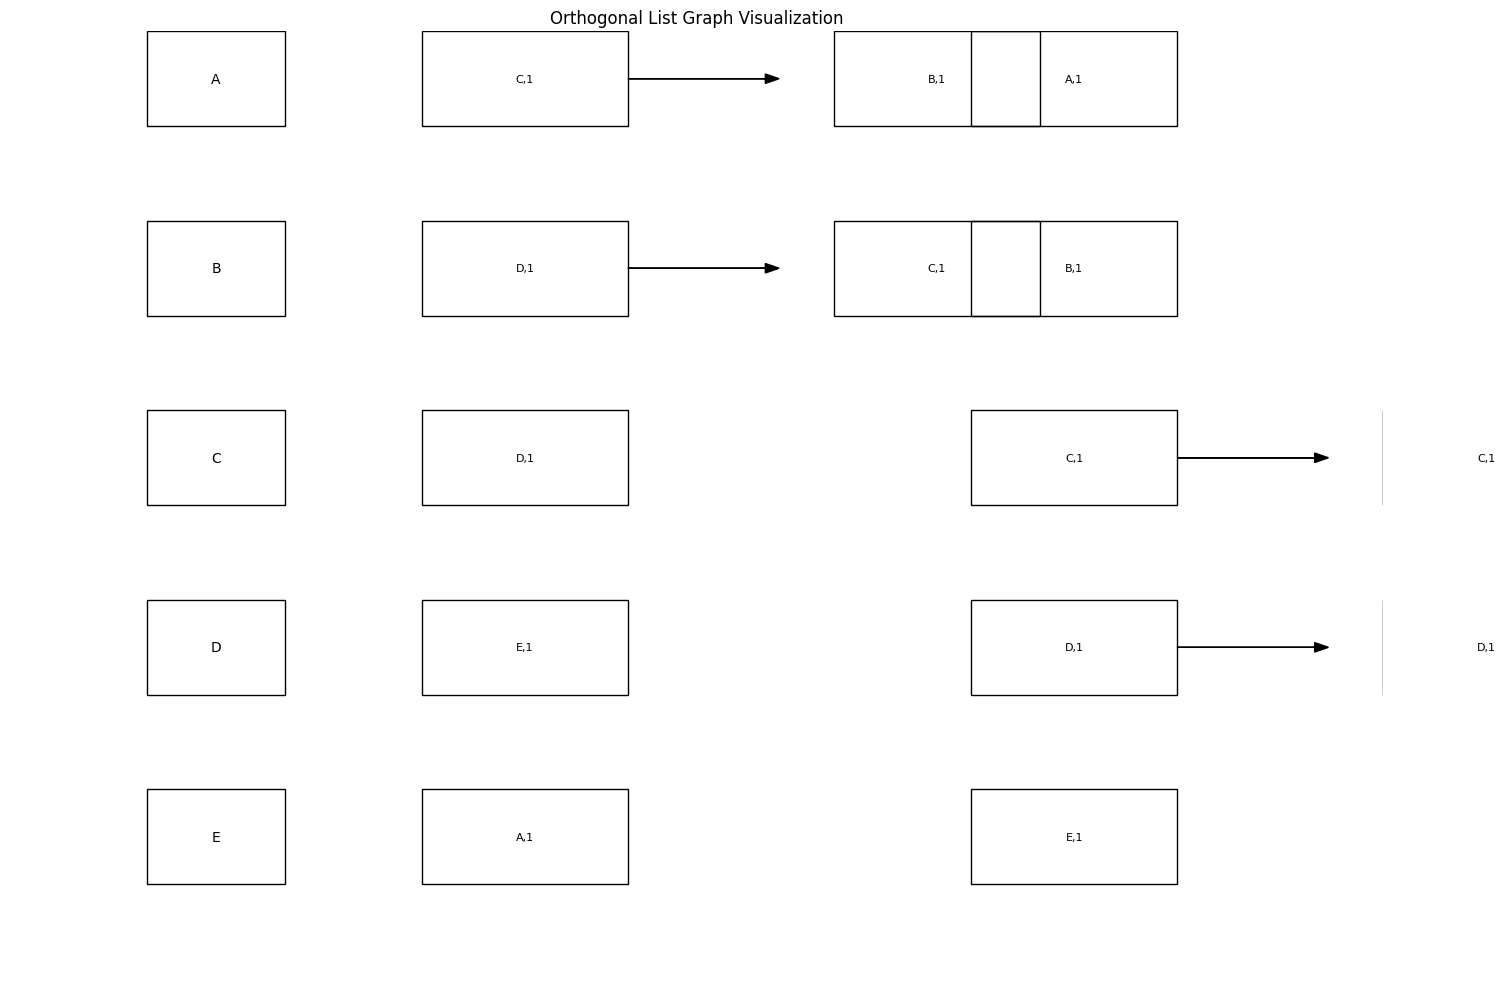

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class ArcNode:
    def __init__(self, tailvex, headvex, weight=1):
        self.tailvex = tailvex
        self.headvex = headvex
        self.weight = weight
        self.hlink = None
        self.tlink = None

class VNode:
    def __init__(self, data):
        self.data = data
        self.firstin = None
        self.firstout = None

class OrthogonalListGraph:
    def __init__(self):
        self.vertices = []
        self.vexnum = 0
        self.arcnum = 0

    def create_default_graph(self):
        self.vertices = [VNode(data) for data in 'ABCDE']
        self.vexnum = 5
        self.arcnum = 7

        self.insert_arc(0, 1)  # A->B
        self.insert_arc(0, 2)  # A->C
        self.insert_arc(1, 2)  # B->C
        self.insert_arc(1, 3)  # B->D
        self.insert_arc(2, 3)  # C->D
        self.insert_arc(3, 4)  # D->E
        self.insert_arc(4, 0)  # E->A

    def insert_arc(self, tail, head, weight=1):
        p = ArcNode(tail, head, weight)
        p.tlink = self.vertices[tail].firstout
        self.vertices[tail].firstout = p
        p.hlink = self.vertices[head].firstin
        self.vertices[head].firstin = p

    def visualize(self):
        fig, ax = plt.subplots(figsize=(15, 10))
        ax.set_xlim(0, 100)
        ax.set_ylim(0, 100)
        ax.axis('off')

        # 绘制顶点表
        for i, v in enumerate(self.vertices):
            self.draw_vnode(ax, 10, 90 - i * 20, v.data)
            self.draw_arc_list(ax, v.firstout, 30, 90 - i * 20, 'out')
            self.draw_arc_list(ax, v.firstin, 70, 90 - i * 20, 'in')

        plt.title("Orthogonal List Graph Visualization")
        plt.tight_layout()
        plt.show()

    def draw_vnode(self, ax, x, y, data):
        rect = patches.Rectangle((x, y), 10, 10, fill=False)
        ax.add_patch(rect)
        ax.text(x + 5, y + 5, data, ha='center', va='center')

    def draw_arc_list(self, ax, first_arc, start_x, y, direction):
        current = first_arc
        x = start_x
        while current:
            self.draw_arcnode(ax, x, y, self.vertices[current.headvex].data, current.weight)
            if direction == 'out':
                next_node = current.tlink
            else:
                next_node = current.hlink
            if next_node:
                ax.arrow(x + 15, y + 5, 10, 0, head_width=1, head_length=1, fc='k', ec='k')
            current = next_node
            x += 30

    def draw_arcnode(self, ax, x, y, data, weight):
        rect = patches.Rectangle((x, y), 15, 10, fill=False)
        ax.add_patch(rect)
        ax.text(x + 7.5, y + 5, f"{data},{weight}", ha='center', va='center', fontsize=8)

# 测试代码
if __name__ == "__main__":
    G = OrthogonalListGraph()
    G.create_default_graph()
    G.visualize()

将有向无环图的邻接矩阵转换为上三角

In [11]:
import numpy as np

def dag_to_upper_triangular(adj_matrix):
    n = len(adj_matrix)
    order = topological_sort(adj_matrix)
    
    # 创建新的矩阵
    new_matrix = np.zeros((n, n), dtype=int)
    
    # 根据拓扑排序重新排列矩阵
    for i in range(n):
        for j in range(n):
            if adj_matrix[order[i]][order[j]] == 1:
                new_matrix[i][j] = 1
    
    return new_matrix, order

def topological_sort(adj_matrix):
    n = len(adj_matrix)
    in_degree = [0] * n
    
    # 计算入度
    for i in range(n):
        for j in range(n):
            if adj_matrix[i][j] == 1:
                in_degree[j] += 1
    
    # 将入度为0的节点加入队列
    queue = [i for i in range(n) if in_degree[i] == 0]
    order = []
    
    while queue:
        v = queue.pop(0)
        order.append(v)
        
        # 减少相邻节点的入度
        for i in range(n):
            if adj_matrix[v][i] == 1:
                in_degree[i] -= 1
                if in_degree[i] == 0:
                    queue.append(i)
    
    return order

# 测试
adj_matrix = np.array([
    [0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0]
])

print("原始邻接矩阵:")
print(adj_matrix)

upper_triangular, order = dag_to_upper_triangular(adj_matrix)

print("\n上三角矩阵:")
print(upper_triangular)

print("\n节点的新顺序:")
print(order)

原始邻接矩阵:
[[0 0 1 1 0]
 [0 0 0 1 1]
 [0 1 0 1 0]
 [0 0 0 0 1]
 [0 0 0 0 0]]

上三角矩阵:
[[0 1 0 1 0]
 [0 0 1 1 0]
 [0 0 0 1 1]
 [0 0 0 0 1]
 [0 0 0 0 0]]

节点的新顺序:
[0, 2, 1, 3, 4]


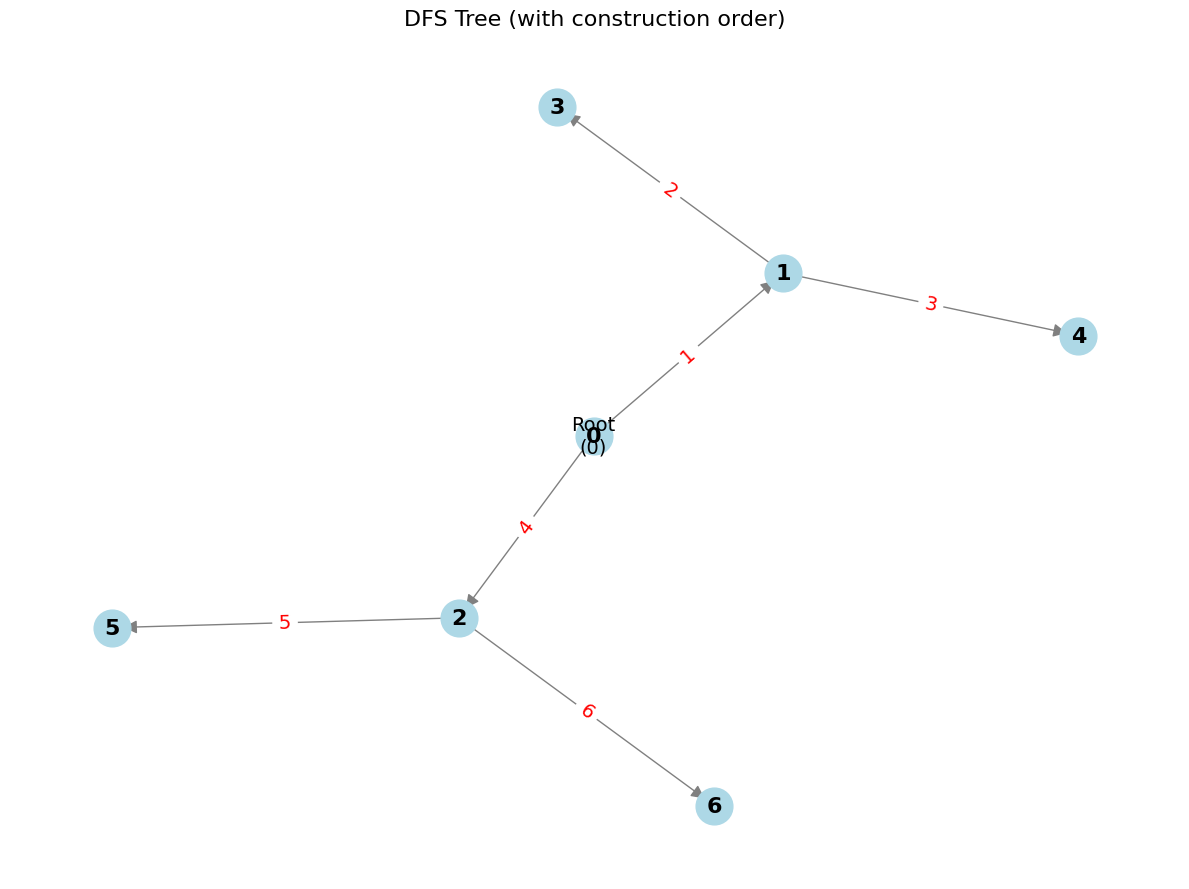

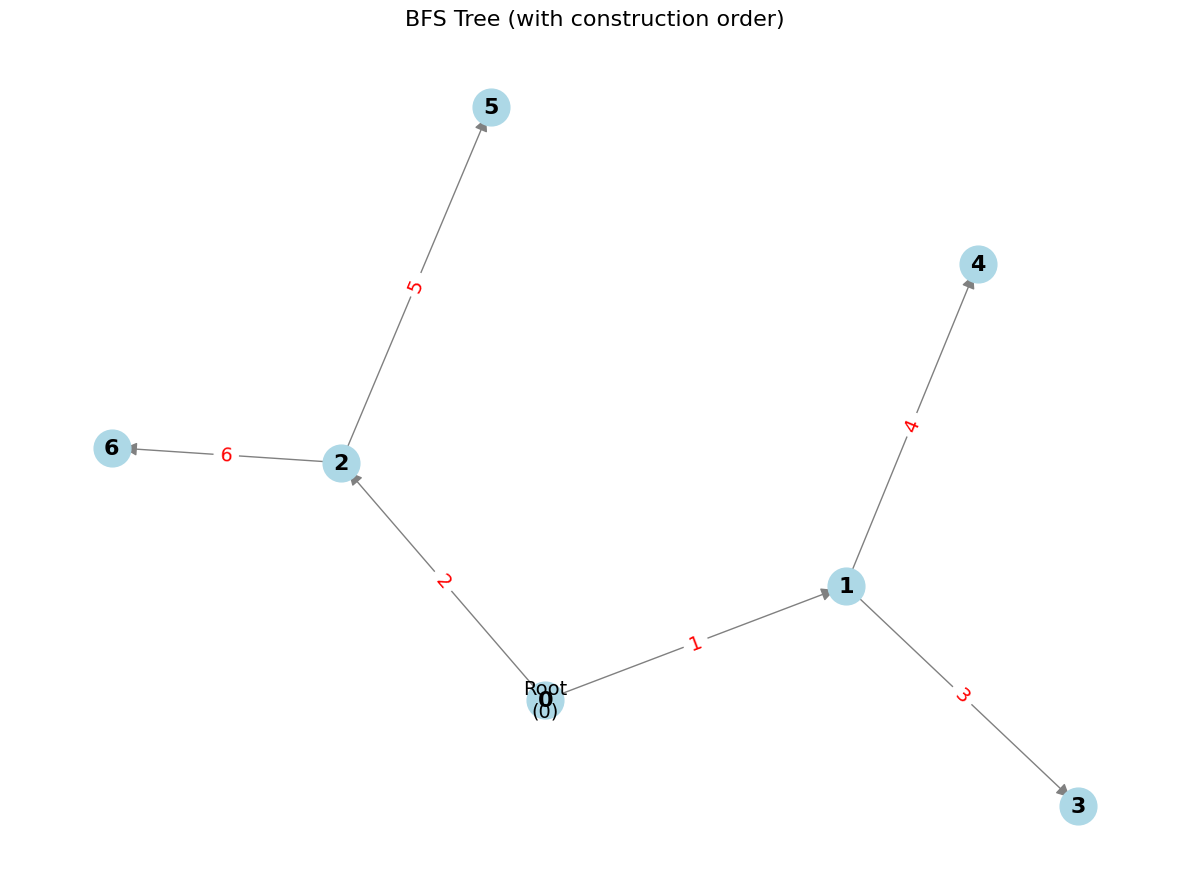

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

def create_graph():
    G = nx.Graph()
    edges = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6)]
    G.add_edges_from(edges)
    return G

def dfs_edges(G, start):
    return list(nx.dfs_edges(G, source=start))

def bfs_edges(G, start):
    return list(nx.bfs_edges(G, source=start))

def create_tree_from_edges(edges):
    T = nx.DiGraph()
    for i, (u, v) in enumerate(edges):
        T.add_edge(u, v, order=i+1)
    return T

def visualize_tree(T, title):
    pos = nx.spring_layout(T, k=0.9, iterations=50)
    plt.figure(figsize=(12, 9))
    
    # 绘制节点
    nx.draw_networkx_nodes(T, pos, node_color='lightblue', node_size=700)
    nx.draw_networkx_labels(T, pos, font_size=16, font_weight='bold')
    
    # 绘制边和顺序标签
    edge_labels = nx.get_edge_attributes(T, 'order')
    nx.draw_networkx_edges(T, pos, edge_color='gray', arrows=True, arrowsize=20)
    nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels, font_size=14, font_color='red')
    
    # 标记根节点
    root = [n for n, d in T.in_degree() if d == 0][0]
    nx.draw_networkx_labels(T, pos, {root: f"Root\n({root})"}, font_size=14)
    
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# 创建原始图
G = create_graph()

# DFS生成树
dfs_tree_edges = dfs_edges(G, 0)
dfs_tree = create_tree_from_edges(dfs_tree_edges)
visualize_tree(dfs_tree, "DFS Tree (with construction order)")

# BFS生成树
bfs_tree_edges = bfs_edges(G, 0)
bfs_tree = create_tree_from_edges(bfs_tree_edges)
visualize_tree(bfs_tree, "BFS Tree (with construction order)")

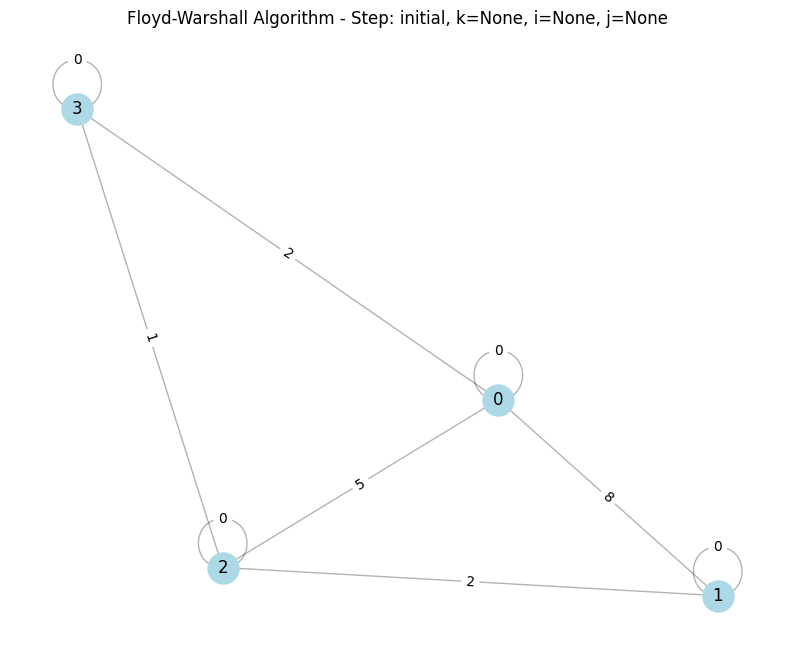

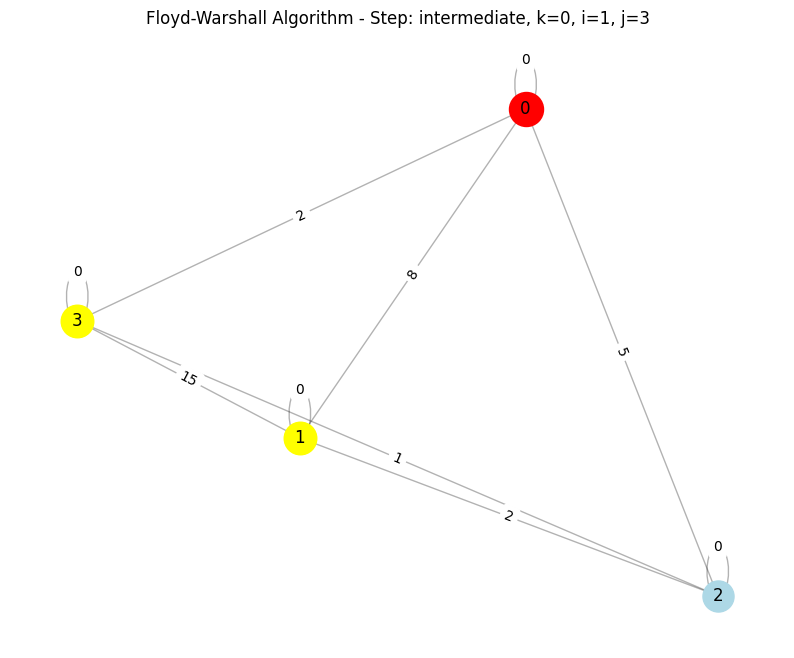

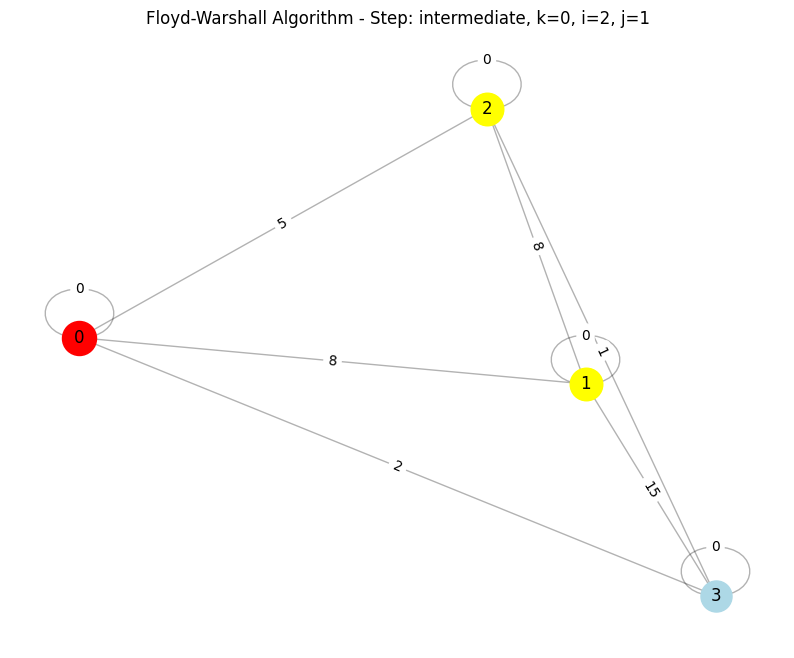

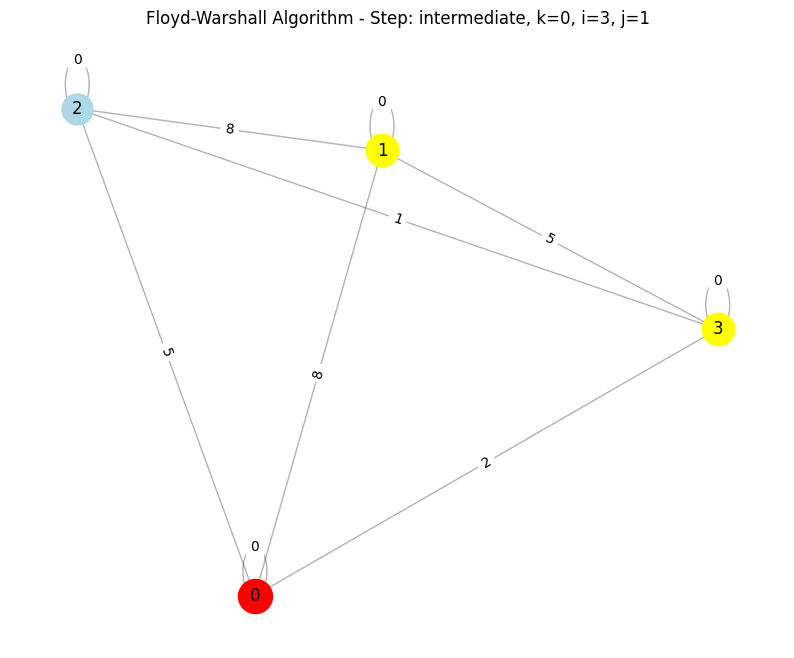

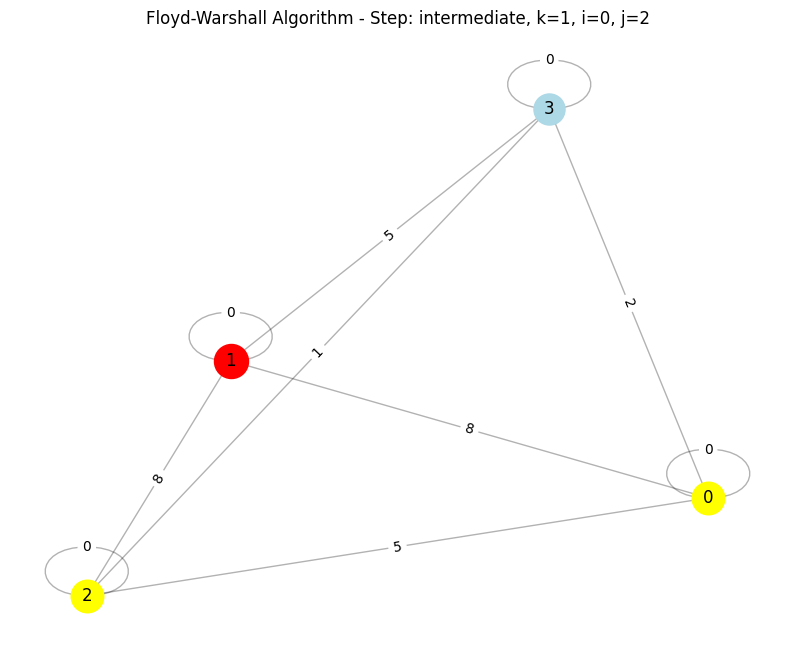

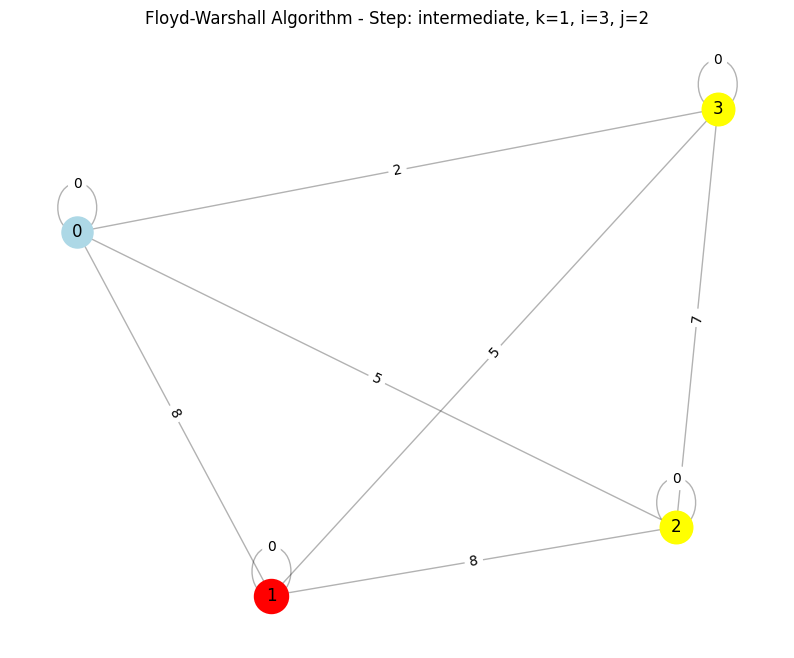

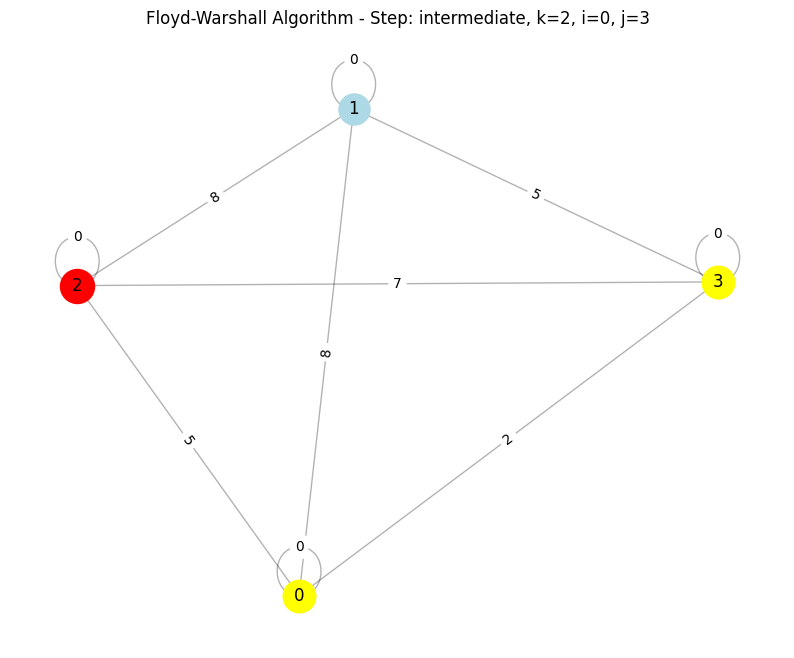

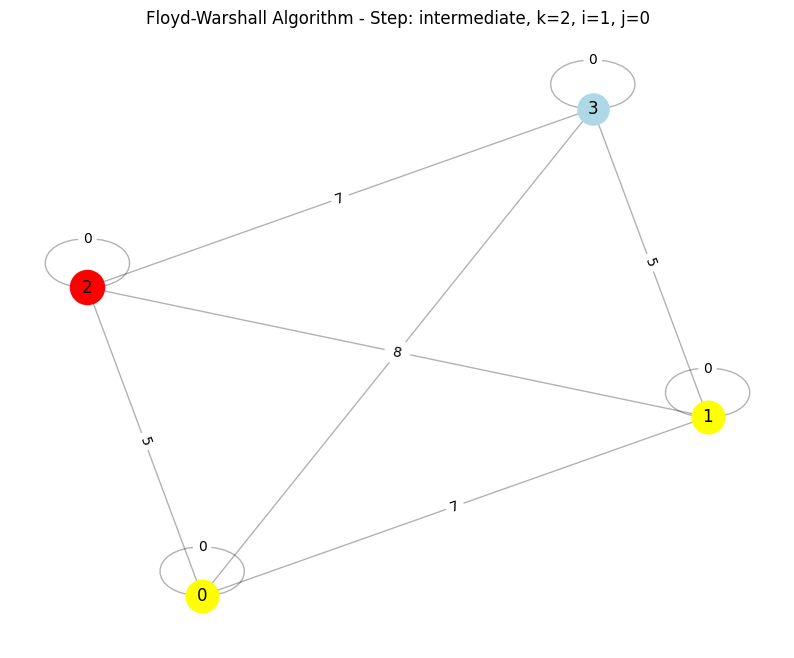

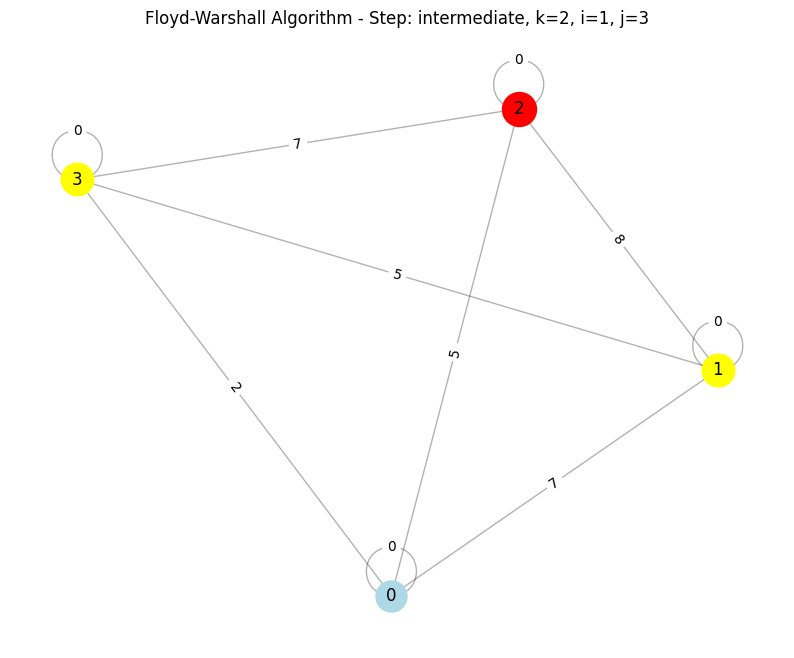

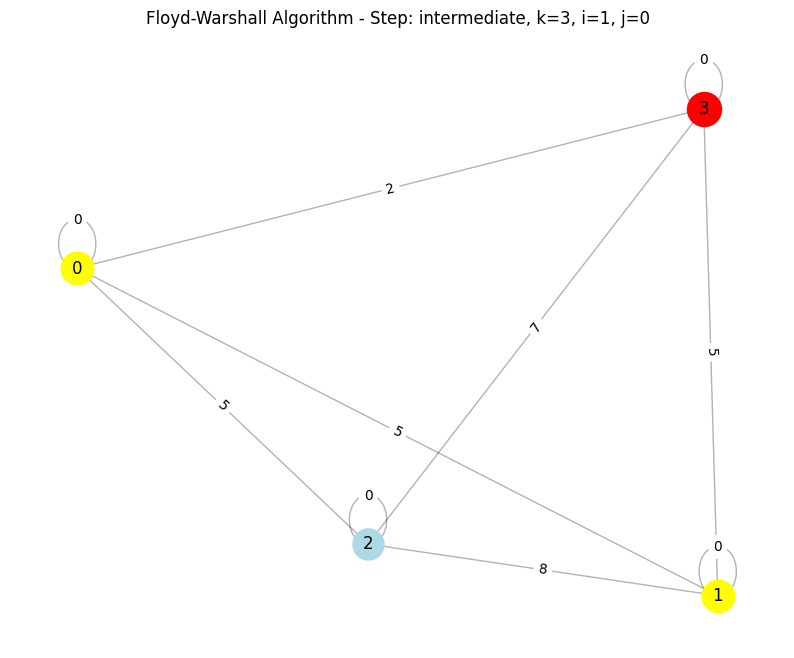

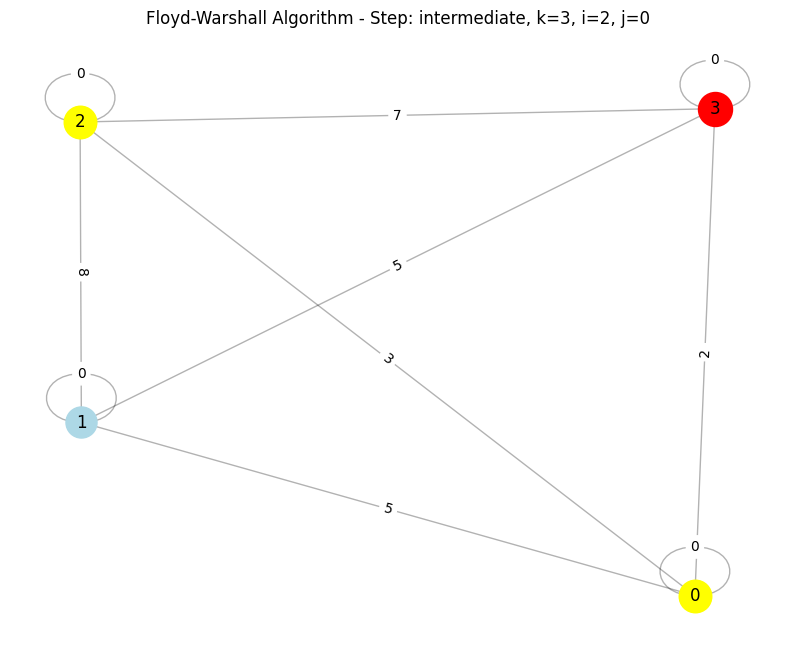

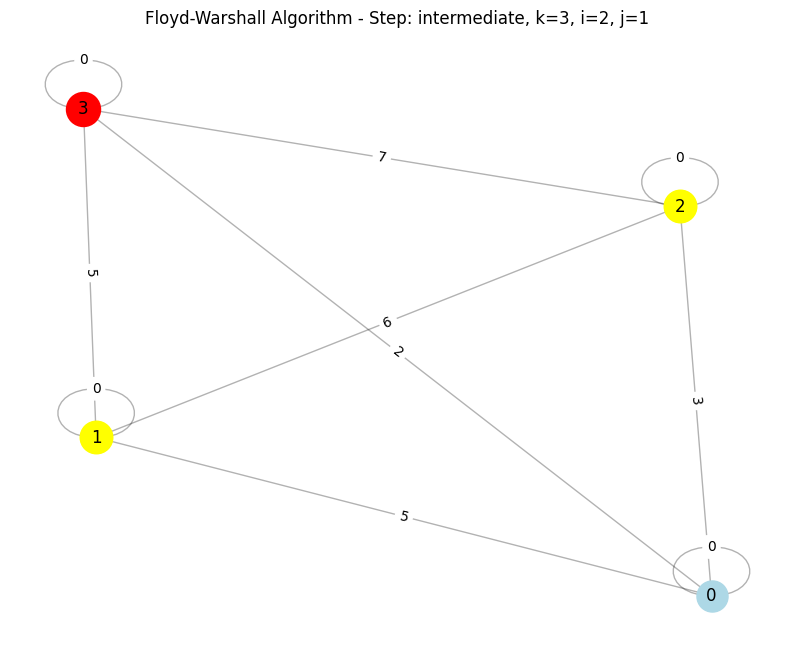

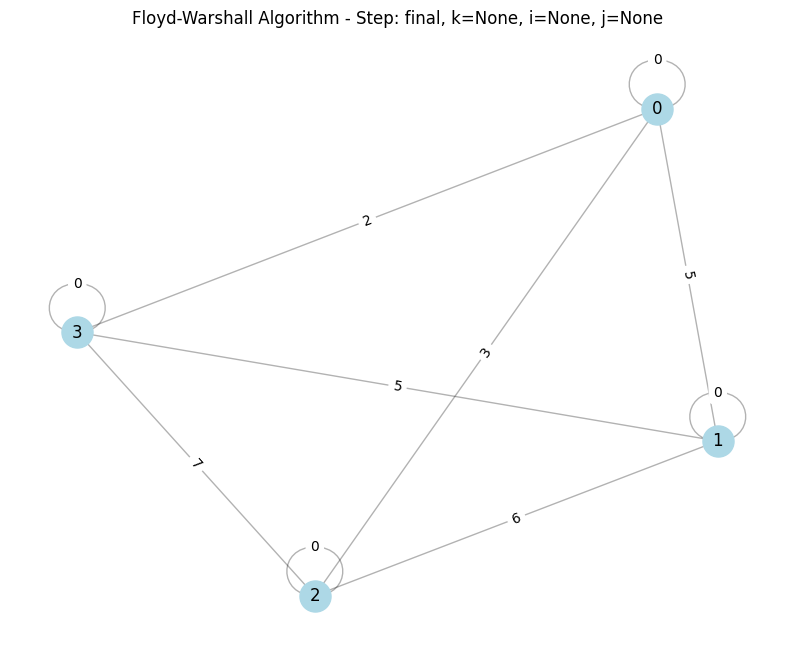

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def floyd_warshall(graph):
    n = len(graph)
    dist = graph.copy()
    path = [[None for _ in range(n)] for _ in range(n)]
    
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    path[i][j] = k
    
    return dist, path

def visualize_floyd(graph, step, k, i, j):
    G = nx.Graph()
    n = len(graph)
    
    # 添加节点和边
    for x in range(n):
        for y in range(n):
            if graph[x][y] != float('inf'):
                G.add_edge(x, y, weight=graph[x][y])
    
    pos = nx.spring_layout(G)
    
    plt.figure(figsize=(10, 8))
    
    # 绘制边
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    
    # 绘制节点
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
    
    # 高亮当前考虑的节点
    if step == 'intermediate':
        nx.draw_networkx_nodes(G, pos, nodelist=[k], node_color='red', node_size=600)
        nx.draw_networkx_nodes(G, pos, nodelist=[i, j], node_color='yellow', node_size=550)
    
    # 添加标签
    nx.draw_networkx_labels(G, pos)
    
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title(f"Floyd-Warshall Algorithm - Step: {step}, k={k}, i={i}, j={j}")
    plt.axis('off')
    plt.show()

# 示例图
graph = [
    [0, 3, float('inf'), 7],
    [8, 0, 2, float('inf')],
    [5, float('inf'), 0, 1],
    [2, float('inf'), float('inf'), 0]
]

# 可视化初始图
visualize_floyd(graph, 'initial', None, None, None)

# 执行Floyd-Warshall算法并可视化中间步骤
n = len(graph)
for k in range(n):
    for i in range(n):
        for j in range(n):
            if graph[i][k] + graph[k][j] < graph[i][j]:
                graph[i][j] = graph[i][k] + graph[k][j]
                visualize_floyd(graph, 'intermediate', k, i, j)

# 可视化最终结果
visualize_floyd(graph, 'final', None, None, None)